In [1]:
import tensorflow as tf

url = 'https://github.com/Horea94/Fruit-Images-Dataset/archive/master.zip'
name = 'fruits360'
file = tf.keras.utils.get_file(name,url,extract=True)

797917184/Unknown - 29s 0us/step

In [2]:
import os

# 指定訓練資料夾目錄
training_path = os.path.sep.join(file.split(os.path.sep)[0:-1]+['Fruit-Images-Dataset-master','Training'])

# 指定測試資料夾目錄
test_path     = os.path.sep.join(file.split(os.path.sep)[0:-1]+['Fruit-Images-Dataset-master','Test'])

# 定義訓練影像資料產生器
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,validation_split=0.1)
# 定義測試影像資料產生器
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# 訓練資料產生器
train_generator = train_datagen.flow_from_directory(training_path,target_size=(100,100),batch_size=32,class_mode='sparse',subset='training')
# 驗證資料產生器
valid_generator = train_datagen.flow_from_directory(training_path,target_size=(100,100),batch_size=32,class_mode='sparse',subset='validation')
# 測試資料產生器
test_generator  = test_datagen.flow_from_directory(test_path,target_size=(100,100),batch_size=32,class_mode='sparse')

Found 60955 images belonging to 131 classes.
Found 6737 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


In [3]:
#類別名稱與代號
print(list(train_generator.class_indices.keys())[1])

#訓練樣本數量與類別數量
print(train_generator.n, train_generator.num_classes)

Apple Crimson Snow
60955 131


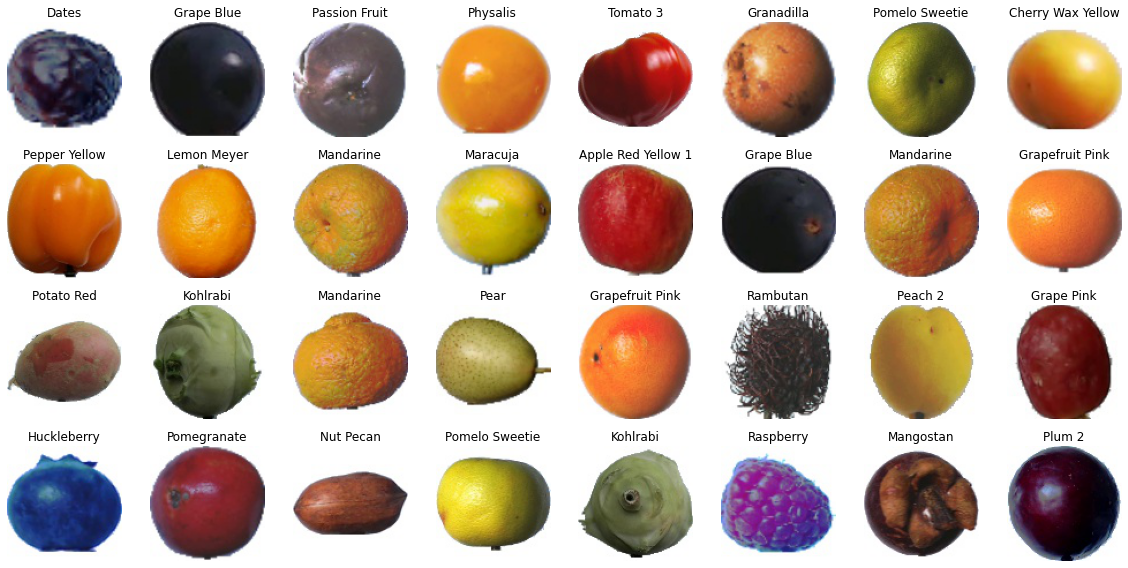

In [4]:
import matplotlib.pyplot as plt

indices_class = {v:name for name,v in train_generator.class_indices.items()}

(X,y)=train_generator.next()

plt.figure(figsize=(16,8))
for i in range(X.shape[0]):
    plt.subplot(4,8,i+1)
    plt.imshow(X[i])
    plt.title(indices_class[int(y[i])])
    plt.axis(False)
plt.tight_layout()    
plt.show()        

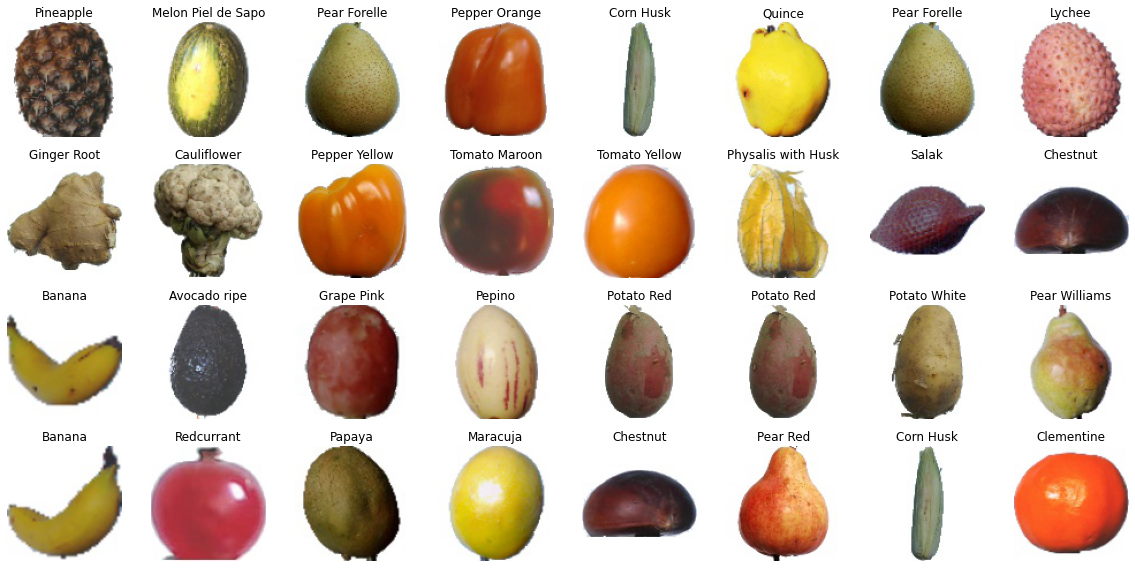

In [ ]:
(X,y)=valid_generator.next()
plt.figure(figsize=(16,8))
for i in range(X.shape[0]):
    plt.subplot(4,8,i+1)
    plt.imshow(X[i])
    plt.title(indices_class[int(y[i])])
    plt.axis(False)
plt.tight_layout()    
plt.show()

In [ ]:
(X,y)=test_generator.next()
plt.figure(figsize=(16,8))
for i in range(X.shape[0]):
    plt.subplot(4,8,i+1)
    plt.imshow(X[i])
    plt.title(indices_class[int(y[i])])
    plt.axis(False)
plt.tight_layout()    
plt.show()     

In [5]:
def fruit_model(height,width,channel,classes,name):
  input = tf.keras.layers.Input((height,width,channel))
  
  conv1 = tf.keras.layers.Conv2D(16,(3,3),padding='valid',activation='relu')(input)
  
  x = tf.keras.layers.BatchNormalization()(conv1)
  x = tf.keras.layers.ReLU()(x)
  x = tf.keras.layers.Conv2D(16,(3,3),padding = 'same',activation='relu')(x)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.ReLU()(x)
  x = tf.keras.layers.Conv2D(16,(3,3),padding = 'same',activation='relu')(x)
  out = tf.keras.layers.Concatenate()([x,conv1])


  z = tf.keras.layers.BatchNormalization()(out)
  z = tf.keras.layers.ReLU()(z)
  z = tf.keras.layers.Conv2D(16,(3,3),padding = 'same',activation='relu')(z)
  z = tf.keras.layers.BatchNormalization()(z)
  z = tf.keras.layers.ReLU()(z)
  z = tf.keras.layers.Conv2D(16,(3,3),padding = 'same',activation='relu')(z)
  out1 = tf.keras.layers.Concatenate()([z,out,conv1]) 
  
  pool = tf.keras.layers.MaxPooling2D((3,3))(out1)
  conv2 = tf.keras.layers.Conv2D(32,(3,3),padding='valid',activation='relu')(pool)
  conv3 = tf.keras.layers.Conv2D(32,(3,3),padding='valid',activation='relu')(conv2)
  
  flat = tf.keras.layers.Flatten()(conv3)
  dense = tf.keras.layers.Dense(classes,activation='relu')(flat)
  dense2 = tf.keras.layers.Dense(classes,activation='softmax')(dense)

  model = tf.keras.Model(inputs=input,outputs=dense2,name=name)
  model.summary()
  model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

  return model
mod = fruit_model(100,100,3,train_generator.num_classes,"fruit_model")

Model: "fruit_model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 98, 98, 16)   448         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 98, 98, 16)   64          conv2d[0][0]                     
__________________________________________________________________________________________________
re_lu (ReLU)                    (None, 98, 98, 16)   0           batch_normalization[0][0]        
________________________________________________________________________________________

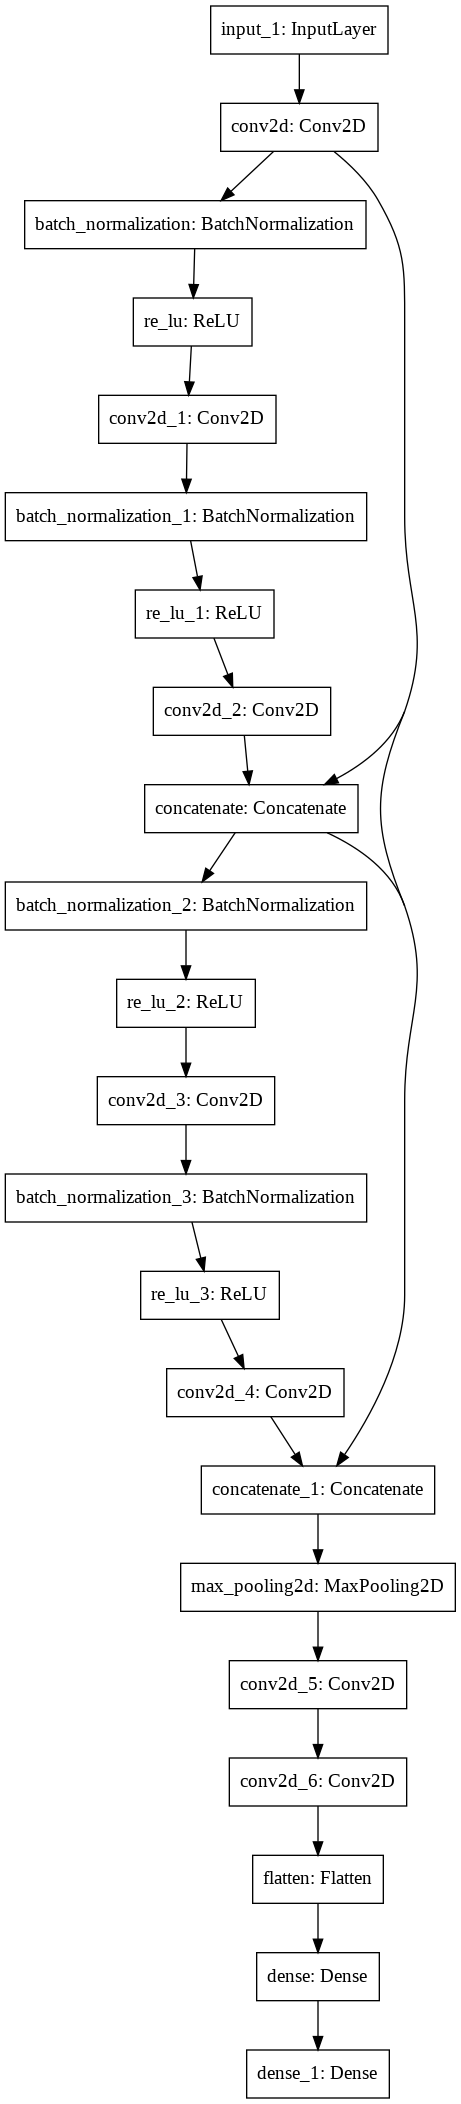

In [6]:
tf.keras.utils.plot_model(mod)

In [7]:
history = mod.fit(train_generator,epochs=10,validation_data=valid_generator)

Epoch 1/10
1905/1905 [==============================] - 113s 42ms/step - loss: 0.3320 - accuracy: 0.9191 - val_loss: 0.3072 - val_accuracy: 0.9221
Epoch 2/10
1905/1905 [==============================] - 81s 42ms/step - loss: 0.0488 - accuracy: 0.9865 - val_loss: 1.3627 - val_accuracy: 0.7337
Epoch 3/10
1905/1905 [==============================] - 81s 42ms/step - loss: 0.0404 - accuracy: 0.9888 - val_loss: 0.3224 - val_accuracy: 0.9288
Epoch 4/10
1905/1905 [==============================] - 80s 42ms/step - loss: 0.0270 - accuracy: 0.9930 - val_loss: 0.7314 - val_accuracy: 0.8646
Epoch 5/10
1905/1905 [==============================] - 80s 42ms/step - loss: 0.0265 - accuracy: 0.9935 - val_loss: 0.4359 - val_accuracy: 0.9366
Epoch 6/10
1905/1905 [==============================] - 80s 42ms/step - loss: 0.0290 - accuracy: 0.9933 - val_loss: 0.3260 - val_accuracy: 0.9234
Epoch 7/10
1905/1905 [==============================] - 80s 42ms/step - loss: 0.0234 - accuracy: 0.9948 - val_loss: 0.4651 

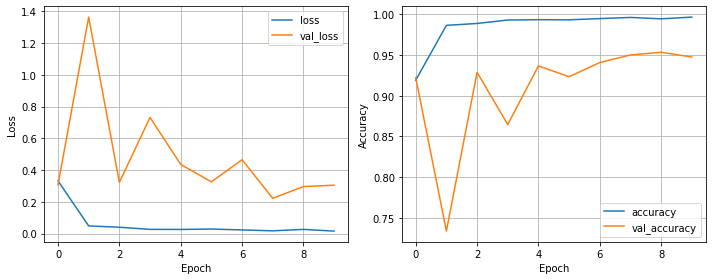

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [10]:
import numpy as np
(X,y)=test_generator.next()
py   = mod.predict(X)
plt.figure(figsize=(16,32))
for i in range(X.shape[0]):
    plt.subplot(8,4,i+1)
    plt.imshow(X[i])
    plt.title(indices_class[np.argmax(py[i])]+'/'+indices_class[int(y[i])])
    plt.axis(False)
plt.tight_layout()    
plt.show()   

Output hidden; open in https://colab.research.google.com to view.

In [20]:
test_generator.reset()
loss,acc = mod.evaluate(test_generator,verbose=0)
print('loss : {:.4f} , acuracy : {:.4f}'.format(loss,acc))

loss : 0.5867 , acuracy : 0.9258
